# ACI Bench EDA for Presentation 1

In [5]:
import os
import pandas as pd

# Directory path
directory = '../../data/raw/aci_bench/src_experiment_data'
directory = os.path.abspath(directory)

# Get all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Separate files with '_metadata' suffix
metadata_files = [file for file in csv_files if file.endswith('_metadata.csv')]
non_metadata_files = [file for file in csv_files if not file.endswith('_metadata.csv')]

# Concatenate the metadata dataframes
metadata_dfs = []
for file in metadata_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df["metadata_file"] = file
    df["source"] = file.replace('_metadata.csv', '')
    metadata_dfs.append(df)

metadata_df = pd.concat(metadata_dfs)

# Concatenate the non-metadata dataframes
non_metadata_dfs = []
for file in non_metadata_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df["data_file"] = file
    df["source"] = file.replace('.csv', '')
    non_metadata_dfs.append(df)

non_metadata_df = pd.concat(non_metadata_dfs)

# Merge the metadata and non-metadata dataframes based on the 'id' column
merged_df = pd.merge(non_metadata_df, metadata_df, on=['id', 'source'])

# Assign the merged dataframe to the variable 'concatenated_df'
concatenated_df = merged_df.sort_values(by='id').reset_index(drop=True)

# Go through concatenated_df, if there are duplicate `id` values, prefer the one with `asrcorr` in the `data_file` column.
# else, prefer the one with `humantrans` in the `data_file` column.
concatenated_df['asrcorr'] = concatenated_df['data_file'].str.contains('asrcorr')
concatenated_df['humantrans'] = concatenated_df['data_file'].str.contains('humantrans')
concatenated_df = concatenated_df.sort_values(by=['id', 'asrcorr', 'humantrans'], ascending=[True, False, False]).drop_duplicates(subset='id', keep='first').reset_index(drop=True)

display(concatenated_df)

,dataset_x,id,dialogue,note,data_file,source,dataset_y,doctor_name,patient_gender,patient_age,patient_firstname,patient_familyname,cc,2nd_complaints,metadata_file,asrcorr,humantrans
0,aci,ACI000,[doctor] so jerry is a 45 -year-old male who c...,CHIEF COMPLAINT\n\nRight ankle injury.\n\nHIST...,test1_aci_asrcorr.csv,test1_aci_asrcorr,aci,michael,male,45.0,Jerry,Cook,right ankle injury,NaN,test1_aci_asrcorr_metadata.csv,True,False
1,aci,ACI001,[doctor] hey george how are you today i unders...,CHIEF COMPLAINT\n\nLeft wrist and hand pain.\n...,train_aci_asrcorr.csv,train_aci_asrcorr,aci,NaN,male,57.0,George,Lewis,left wrist and hand pain,NaN,train_aci_asrcorr_metadata.csv,True,False
2,aci,ACI002,[doctor] okay michael so i see in here that yo...,CHIEF COMPLAINT\n\nBack pain.\n\nMEDICAL HISTO...,test3_aci_asrcorr.csv,test3_aci_asrcorr,aci,NaN,male,NaN,Michael,NaN,back pain,strep throat,test3_aci_asrcorr_metadata.csv,True,False
3,aci,ACI003,[patient] and good morning hi beverly\n[doctor...,HISTORY OF PRESENT ILLNESS\n\nBeverly Howard i...,test3_aci_asrcorr.csv,test3_aci_asrcorr,aci,NaN,female,35.0,33,Howard,right knee pain,NaN,test3_aci_asrcorr_metadata.csv,True,False
4,aci,ACI004,[doctor] hi billy how are you what's been goin...,CHIEF COMPLAINT\n\nDifficulty urinating.\n\nME...,train_aci_asrcorr.csv,train_aci_asrcorr,aci,NaN,male,NaN,Billy,NaN,difficulty urinating,coronary artery disease;diabetes,train_aci_asrcorr_metadata.csv,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,virtscribe,VS035,"[doctor] patient is julia jones , date of birt...",CHIEF COMPLAINT\n\nMacromastia.\n\nHISTORY OF ...,test1_virtscribe_humantrans.csv,test1_virtscribe_humantrans,virtscribe,gonzales,female,25,julia,jones,macromastia,none,test1_virtscribe_humantrans_metadata.csv,False,True
148,virtscribe,VS036,"[doctor] tyler nelson , date of birth : 3 , 6 ...",CHIEF COMPLAINT\n\nRheumatoid arthritis manage...,test2_virtscribe_humantrans.csv,test2_virtscribe_humantrans,virtscribe,NaN,male,72,tyler,nelson,rheumatoid arthritis,edema,test2_virtscribe_humantrans_metadata.csv,False,True
149,virtscribe,VS037,"[doctor] judy gomez , mrn 869723 . date of bir...",CHIEF COMPLAINT\n\nPsoriatic arthritis managem...,test1_virtscribe_humantrans.csv,test1_virtscribe_humantrans,virtscribe,NaN,female,61,judy,gomez,Psoriatic arthritis,none,test1_virtscribe_humantrans_metadata.csv,False,True
150,virtscribe,VS038,"[doctor] kelly wood . date of birth , february...",CHIEF COMPLAINT\n\nHematuria.\nChronic urolith...,test1_virtscribe_humantrans.csv,test1_virtscribe_humantrans,virtscribe,NaN,female,41,kelly,wood,hematuria,Chronic urolithiasis,test1_virtscribe_humantrans_metadata.csv,False,True


In [6]:
concatenated_df.describe()

,dataset_x,id,dialogue,note,data_file,source,dataset_y,doctor_name,patient_gender,patient_age,patient_firstname,patient_familyname,cc,2nd_complaints,metadata_file,asrcorr,humantrans
count,152,152,152,152,152,152,152,20,148,117.0,146,105,152,85,152,152,152
unique,2,152,152,152,10,10,2,20,4,64.0,118,74,122,60,10,2,2
top,aci,ACI000,[doctor] so jerry is a 45 -year-old male who c...,CHIEF COMPLAINT\n\nRight ankle injury.\n\nHIST...,train_aci_asrcorr.csv,train_aci_asrcorr,aci,michael,male,45.0,jacqueline,edwards,back pain,none,train_aci_asrcorr_metadata.csv,True,False
freq,112,1,1,1,35,35,112,1,65,8.0,3,4,6,16,35,112,124


In [8]:
import textwrap

width = 100

# Input: row number
row_number = 1

# Access the row based on the row number
df = concatenated_df
row = df.iloc[row_number]

# Perform EDA on the row
# Example: Print the values in each column of the row
for column in df.columns:
    print(f'\nColumn: {column}')
    for line in str(df[column].iloc[row_number]).split("\n"):
        wrapped_text = textwrap.wrap(line, width)
        [print(wt) for wt in wrapped_text]


Column: dataset_x
aci

Column: id
ACI001

Column: dialogue
[doctor] hey george how are you today i understand you're here for some numbness and tingling in
your fingers and some pain in your wrist
[patient] right my left wrist and hand has been bothering me probably for a few months now with pain
and numbness
[doctor] okay and you said that's been ongoing for several months do you know what caused this type
of pain or is it just something that started slowly or
[patient] it just kinda started on it's own it i notice it mostly at night
[doctor] okay
[patient] sometimes it will i'll wake up and my hands asleep and i got ta shake it out
[doctor] shake it out and okay
[patient] and then some
[doctor] what kind of work do you do
[patient] i do yard work
[doctor] yard work
[patient] landscaping landscaping
[doctor] landscaping okay so a lot of raking a lot of digging so a lot of repetitive type movements
[patient] yeah it's pretty heavy labor but it's yeah the same thing day in and day out


In [10]:
from transformers import AutoTokenizer
from huggingface_hub import notebook_login

notebook_login()

In [47]:
# columns: dataset_x	id	dialogue	note	data_file	source	dataset_y	doctor_name	patient_gender	patient_age	patient_firstname	patient_familyname	cc	2nd_complaints	metadata_file	asrcorr	humantrans
# For each row, perform tokenization on the 'dialogue' and `note` columns
# Use the `epfl-llm/meditron-70b` model for tokenization, using the `transformers` library

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("epfl-llm/meditron-70b")

# Tokenize the 'dialogue' and 'note' columns
df = concatenated_df

dialogue_tokens = tokenizer.batch_encode_plus(df['dialogue'].str.replace('\n', ' ').tolist(), padding="longest", return_tensors='np')
note_tokens = tokenizer.batch_encode_plus(df['note'].str.replace('\n', ' ').tolist(), padding="longest", return_tensors='np')

# Add the tokenized columns to the dataframe
df['dialogue_tokens'] = [dialogue_tokens['input_ids'][i] for i in range(len(df))]
df['note_tokens'] = [note_tokens['input_ids'][i] for i in range(len(df))]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Dialogue: range=850-3763, mean=1814, median=1713
Note: range=364-1468, mean=755, median=712


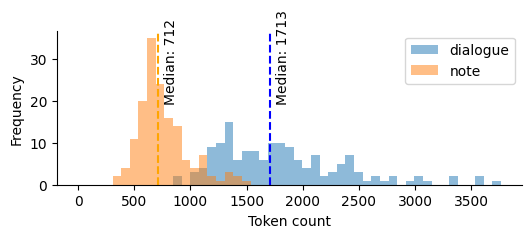

In [204]:
# Some stats

import numpy as np
import matplotlib.pyplot as plt

dialogue_count = dialogue_tokens["attention_mask"].sum(axis=1)
note_count = note_tokens["attention_mask"].sum(axis=1)

# min, max, mean, median
print(f"Dialogue: range={dialogue_count.min()}-{dialogue_count.max()}, mean={int(dialogue_count.mean())}, median={int(np.median(dialogue_count))}")
print(f"Note: range={note_count.min()}-{note_count.max()}, mean={int(note_count.mean())}, median={int(np.median(note_count))}")

# Plot histogram
fig = plt.figure(figsize=(6, 2))
bins = np.linspace(0, max(max(dialogue_count), max(note_count)), 50)
plt.hist(dialogue_count, bins, alpha=0.5, label='dialogue')
plt.hist(note_count, bins, alpha=0.5, label='note')

plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# median
plt.axvline(x=np.median(dialogue_count), color='blue', linestyle='--')
plt.axvline(x=np.median(note_count), color='orange', linestyle='--')

plt.text(np.median(dialogue_count) + 50, 20, f'Median: {int(np.median(dialogue_count))}', rotation=90, color='black')
plt.text(np.median(note_count) + 50, 20, f'Median: {int(np.median(note_count))}', rotation=90, color='black')

# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# save
fig.savefig('token_count_histogram.png', bbox_inches='tight')


In [100]:
# From each note, extract words that are in ALL CAPS

import re
from collections import Counter
from pprint import pprint

# Extract words in ALL CAPS from the 'note' column
df = concatenated_df

all_caps_words_all_notes = []

# Iterate over each note
for note in df['note']:
    all_caps_words = []
    # Split the note into lines
    lines = note.split('\n')

    # Iterate over each line
    for line in lines:
        # Find all uppercase words in the line using regex
        words = re.findall(r'\b[A-Z]{2,}\b', line)

        # Add the words to the list
        recombinant = ' '.join(words)
        if words and len(recombinant) > 5 and any(len(word) > 5 for word in words):
            all_caps_words.append(recombinant)

    # Add the extracted words to the list
    all_caps_words_all_notes.append(all_caps_words)

# Add the extracted words to the dataframe
df['all_caps_words'] = all_caps_words_all_notes

# Display unique extracted words and count
unique_words = set(word for words in all_caps_words_all_notes for word in words)
print(f'Unique extracted words: {len(unique_words)}')
word_counts = Counter(word for words in all_caps_words_all_notes for word in words)
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
print("Word counts:")
for word, count in word_counts.items():
    print(f'{count}\t{word}')

Unique extracted words: 26
Word counts:
145	PHYSICAL EXAM
139	CHIEF COMPLAINT
112	REVIEW OF SYSTEMS
106	RESULTS
105	INSTRUCTIONS
98	HISTORY OF PRESENT ILLNESS
97	ASSESSMENT
82	SOCIAL HISTORY
77	VITALS
57	MEDICAL HISTORY
55	ASSESSMENT AND PLAN
54	MEDICATIONS
31	FAMILY HISTORY
24	PAST HISTORY
24	CURRENT MEDICATIONS
16	SURGICAL HISTORY
15	ALLERGIES
12	RESPIRATORY
3	CONSTITUTIONAL
2	REVIEW OF SYMPTOMS
2	PROCEDURE
1	ORDERS
1	PENICILLIN
1	SUBJECTIVE
1	BIRTH HISTORY
1	PAST MEDICAL HISTORY


Based on above, the notes written are quite heterogenous, but can be categorized into:

1. Patient Background
  - Chief Complaint: Initial reason for the visit, setting the stage for the encounter.
  - History of Present Illness: Detailed description of the patient's current complaint.
  - Social History: Information on the patient’s lifestyle, social factors affecting health.
  - Family History: Health-related information about the patient's family.
  - Past Medical History: Summary of patient's past health issues.
  - Surgical History: Details of past surgeries.
  - Allergies: Documented allergies.
2. Medical Examination
  - Physical Exam: Findings from the physical examination conducted by the healthcare provider.
  - Vitals: Basic vital signs like blood pressure, temperature, etc.
  - Review of Systems: Systematic review of each body system to note any symptoms not directly related to the main complaint.
3. Diagnostic Results
  - Results: Outcomes from tests and diagnostic procedures.
  - Medications: Current and newly prescribed medications, includes both "Medications" and "Current Medications".
  - Respiratory: Specific notes pertaining to respiratory assessments, often part of specialized exams.
4. Assessment and Treatment Plans
  - Assessment: Doctor's findings and diagnosis.
  - Assessment and Plan: Combined findings and planned actions/treatments.
  - Instructions: Guidance or follow-up instructions given to the patient.
  - Procedure: Notes on any procedures performed or to be performed.
5. Miscellaneous/Specific Entries
  - Constitutional: Notes on general appearance and overall health.
  - Review of Symptoms: Another form of systems review, focusing on symptoms.
  - Orders: Specific orders for tests, treatments, or procedures to be carried out.

In [115]:
word_match = ['RESPIRATORY' in wds for wds in df['all_caps_words']]

# view rows
print(df[word_match].sample(1)["note"].values[0])

CHIEF COMPLAINT

Shortness of breath.

HISTORY OF PRESENT ILLNESS
Charles Sullivan is a pleasant 45-year-old male who presents to the clinic today for the evaluation of shortness of breath. The onset of his symptoms began 2 years ago. He has noticed that his breathing is not what it used to be. He describes an increased need to catch his breath. The patient also reports he gets “mid-shortness of breath” without reason. He has been seen at an urgent care where he received a nebulizer treatment and was prescribed an inhaler, which he uses when his symptoms are present. The patient states his symptoms are aggravated by living with a cat in his house and are present even when the cat is not around or is outside. He has experienced epiphora with rheum present that he attributes to allergies. He has had diarrhea after consuming large amounts of alcohol. He denies any symptoms at this time including shortness of breath, rash, nausea, vomiting, and lip or throat swelling. The patient denies an

In [195]:
# How many entries are related to Heart Failures? find a list of related words, all lower caps, in the columns `note`, `dialogue`, `cc`, `2nd_complaints`

related_words = ['heart failure', 'hf', 'cardiac failure', 'chf']
relevant_columns = ['note', 'dialogue', 'cc', '2nd_complaints']

# Find the number of entries related to heart failures
df = concatenated_df.copy()

for col in relevant_columns:
    df[col] = df[col].astype(str).str.lower()

heart_failure_rows = []
for idx, row in df.iterrows():
    # Check if any of the related words are present
    if any([any([re.search(r'\b' + word + r'\b', row[col]) for word in related_words]) for col in relevant_columns]):
        heart_failure_rows.append(idx)

# Display the number of entries related to heart failures
print(f'Number of entries related to heart failures: {len(heart_failure_rows)}')

Number of entries related to heart failures: 8


In [201]:
# Verify the results; print a random entry related to heart failures
# highlight the related words in the note
# pick a random row, not necessarily the first one
idx = np.random.choice(heart_failure_rows)
# idx = heart_failure_rows[4]

all_text = '\n'.join([df.loc[idx, col] for col in relevant_columns])
for word in related_words:
    all_text = all_text.replace(word, f'**{word.upper()}**')
print(all_text)

chief complaint

follow-up.

history of present illness

nicole miller is a 71-year-old female who presents for follow-up. the patient was called in for a follow up with me for chronic congestive **HEART FAILURE** with diastolic dysfunction. her bnp had been 3000 in 03/2021, up to 6000 in 04/2021. she was increasingly dyspneic. we had changed her furosemide to torsemide at 20 mg by mouth daily. the patient is not on a potassium supplement currently. her lisinopril had also been increased up to 10 mg daily in 03/2021.

i last saw her in 04/2021, and she had reported being interested in having her right knee replaced this summer at east metropolitan hospital, so it was recommended that we work to control her cardiovascular status prior to surgery. she is currently scheduled to have surgery on 06/24/2021. she plans to discontinue clopidogrel a week before her surgery.

the patient states that she has lost approximately 3 to 3.5 pounds since her last visit in 04/2021. some of which may be 

## Attempt in Categorizing Diseases

In [224]:
import pandas as pd

df = concatenated_df.copy()

# Assume df is your DataFrame. Combine all relevant_columns into a single column
# fillna before concat
for col in relevant_columns:
    df[col] = df[col].fillna('')
df['disease_mentions'] = df['note'] + ' ' + df['dialogue'] + ' ' + df['cc'] + ' ' + df['2nd_complaints']
df['disease_mentions'] = df['disease_mentions'].str.replace('\n', ' ')
df['disease_mentions'] = df['disease_mentions'].str.lower()

In [257]:
disease_categories = {
    # Cardiovascular Diseases
    'heart failure': 'Cardiovascular',
    'hypertension': 'Cardiovascular',
    'myocardial infarction': 'Cardiovascular',
    'arrhythmia': 'Cardiovascular',
    'angina': 'Cardiovascular',
    'atherosclerosis': 'Cardiovascular',
    'cardiomyopathy': 'Cardiovascular',
    'peripheral artery disease': 'Cardiovascular',
    'venous thromboembolism': 'Cardiovascular',

    # Endocrine Disorders
    'diabetes mellitus': 'Endocrine',
    'hyperthyroidism': 'Endocrine',
    'hypothyroidism': 'Endocrine',
    'adrenal insufficiency': 'Endocrine',
    'cushing\'s syndrome': 'Endocrine',
    'pcos': 'Endocrine',  # Polycystic ovary syndrome

    # Respiratory Diseases
    'asthma': 'Respiratory',
    'chronic obstructive pulmonary disease': 'Respiratory',
    'pulmonary embolism': 'Respiratory',
    'pneumonia': 'Respiratory',
    'tuberculosis': 'Respiratory',
    'bronchitis': 'Respiratory',

    # Neurological Disorders
    'stroke': 'Neurological',
    'multiple sclerosis': 'Neurological',
    'parkinson\'s disease': 'Neurological',
    'alzheimer\'s disease': 'Neurological',
    'epilepsy': 'Neurological',
    'migraine': 'Neurological',

    # Gastrointestinal Disorders
    'crohn\'s disease': 'Gastrointestinal',
    'ulcerative colitis': 'Gastrointestinal',
    'hepatitis': 'Gastrointestinal',
    'cirrhosis': 'Gastrointestinal',
    'gallstones': 'Gastrointestinal',
    'gastroenteritis': 'Gastrointestinal',
    'peptic ulcer': 'Gastrointestinal',

    # Musculoskeletal Disorders
    'rheumatoid arthritis': 'Musculoskeletal',
    'osteoarthritis': 'Musculoskeletal',
    'osteoporosis': 'Musculoskeletal',
    'fibromyalgia': 'Musculoskeletal',
    'muscular dystrophy': 'Musculoskeletal',

    # Psychiatric Disorders
    'depression': 'Psychiatric',
    'anxiety': 'Psychiatric',
    'bipolar disorder': 'Psychiatric',
    'schizophrenia': 'Psychiatric',
    'autism spectrum disorder': 'Psychiatric',

    # Infectious Diseases
    'hiv': 'Infectious Diseases',
    'influenza': 'Infectious Diseases',
    'herpes zoster': 'Infectious Diseases',
    'malaria': 'Infectious Diseases',
    'covid-19': 'Infectious Diseases',

    # Oncological Disorders
    'breast cancer': 'Oncological',
    'prostate cancer': 'Oncological',
    'lung cancer': 'Oncological',
    'colon cancer': 'Oncological',
    'leukemia': 'Oncological',

    # Dermatological Disorders
    'psoriasis': 'Dermatological',
    'eczema': 'Dermatological',
    'acne': 'Dermatological',
    'rosacea': 'Dermatological',
    'melanoma': 'Dermatological',

    # Orthopedic/Musculoskeletal Conditions
    'ankle injury': 'Orthopedic',
    'knee pain': 'Orthopedic',
    'knee injury': 'Orthopedic',
    'back pain': 'Orthopedic',
    'neck pain': 'Orthopedic',
    'shoulder pain': 'Orthopedic',
    'elbow pain': 'Orthopedic',
    'foot pain': 'Orthopedic',
    'foot ulcer': 'Orthopedic',
    'hand pain': 'Orthopedic',
    'wrist injury': 'Orthopedic',
    'heel pain': 'Orthopedic',
    'flank pain': 'Orthopedic',
    'low back pain': 'Orthopedic',
    'LCL strain': 'Orthopedic',
    'reduction mammoplasty follow up': 'Orthopedic',
    'unicompartmental arthroplasty follow up': 'Orthopedic',
    'shoulder injury': 'Orthopedic',
    'arm pain': 'Orthopedic',

    # Gastrointestinal Disorders
    'IBS': 'Gastrointestinal',  # Irritable Bowel Syndrome
    'abdominal pain': 'Gastrointestinal',

    # Visual and Ocular Conditions
    'changes in vision': 'Ophthalmological',
    'wet macular degeneration': 'Ophthalmological',
    'eye twitch': 'Ophthalmological',

    # Immunological Disorders
    'low immunoglobulin A level': 'Immunological',

    # Cardiovascular and Blood Conditions
    'hypercholesterolemia': 'Cardiovascular',

    # Lifestyle and Behavioral Health
    'smoking cessation': 'Behavioral Health',

    # Renal and Urinary Conditions
    'hematuria': 'Renal',
    'renal screening tests': 'Renal',

    # Other Conditions
    'difficulty swallowing': 'Gastrointestinal',  # Could be linked to gastroesophageal issues
    'evaluation of right foot wound': 'Orthopedic',  # Categorized under wound care/orthopedic if chronic

}


def categorize_diseases(disease_text, mapping):
    categories = set()
    for disease, category in mapping.items():
        if disease in disease_text:
            categories.add(category)
    return list(categories)

def subcategorize_diseases(disease_text, mapping):
    categories = set()
    for disease, category in mapping.items():
        if disease in disease_text:
            categories.add(disease)
    return list(categories)

df['disease_categories'] = df['disease_mentions'].apply(lambda x: categorize_diseases(x, disease_categories))
df['disease_subcategories'] = df['disease_mentions'].apply(lambda x: subcategorize_diseases(x, disease_categories))


In [258]:
# how many entries have no disease categories
no_disease_categories = df['disease_categories'].apply(len) == 0
print(f'Number of entries with no disease categories: {no_disease_categories.sum()}')

# display all unique `cc` values for entries with no disease categories
unique_cc_values = df[no_disease_categories]['cc'].unique()
print(f'Unique `cc` values for entries with no disease categories:')
for cc in unique_cc_values:
    print(cc)

Number of entries with no disease categories: 3
Unique `cc` values for entries with no disease categories:
low immunoglobulin A level
Right ankle pain
Right great toe pain


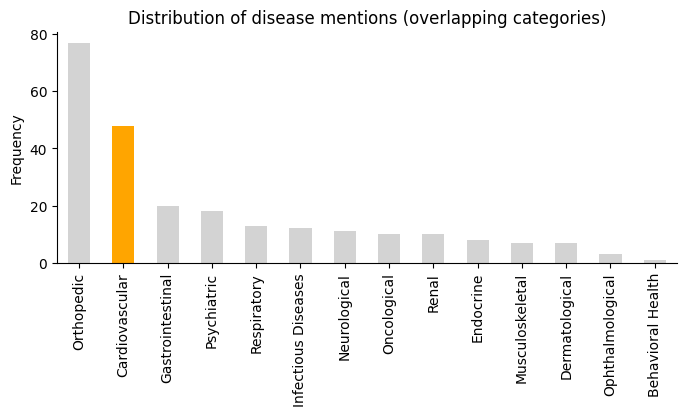

In [259]:
import matplotlib.pyplot as plt

# Aggregate data
category_counts = df['disease_categories'].explode().value_counts()

# Generate a list of colors
colors = ['orange' if cat == 'Cardiovascular' else 'lightgray' for cat in category_counts.index]

# Plot
fig = plt.figure(figsize=(8, 3))
category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of disease mentions (overlapping categories)')

plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# save
fig.savefig('disease_mentions_distribution.png', bbox_inches='tight')

/var/folders/qp/hy557z1d5_5ckqwp_fxv8j440000gn/T/ipykernel_11586/3095242117.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardiovascular_df['disease_subcategories'] = cardiovascular_df['disease_subcategories'].apply(lambda x: [subcat for subcat in x if subcat in reverse_disease_categories['Cardiovascular']])


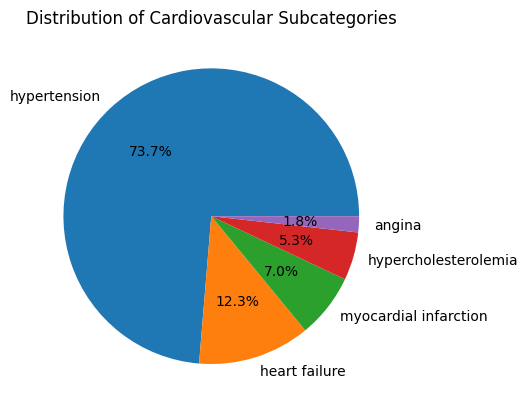

In [272]:
# For "Cardiovascular" category, make a pie chart of the subcategories

# Create a new DataFrame that only contains the rows where 'disease_categories' contains 'Cardiovascular'
cardiovascular_df = df[df['disease_categories'].apply(lambda x: 'Cardiovascular' in x)]

# filter to only cardiovascular subcategories
# first get a reverse of the dictionary
reverse_disease_categories = {}
for key, value in disease_categories.items():
    reverse_disease_categories[value] = reverse_disease_categories.get(value, [])
    reverse_disease_categories[value].append(key)

# filter to only cardiovascular subcategories
cardiovascular_df['disease_subcategories'] = cardiovascular_df['disease_subcategories'].apply(lambda x: [subcat for subcat in x if subcat in reverse_disease_categories['Cardiovascular']])

# count subcategories
subcategory_counts = cardiovascular_df['disease_subcategories'].explode().value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Cardiovascular Subcategories')

plt.show()

In [287]:
category_counts

disease_categories
Orthopedic             77
Cardiovascular         48
Gastrointestinal       20
Psychiatric            18
Respiratory            13
Infectious Diseases    12
Neurological           11
Oncological            10
Renal                  10
Endocrine               8
Musculoskeletal         7
Dermatological          7
Ophthalmological        3
Behavioral Health       1
Name: count, dtype: int64

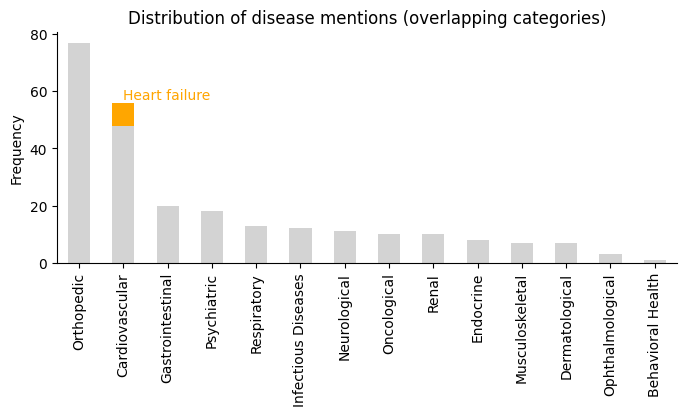

In [292]:
# Aggregate data
category_counts = df['disease_categories'].explode().value_counts()

# Generate a list of colors
orange = (1.0, 0.65, 0.0, 1.0)
lightgray = (0.83, 0.83, 0.83, 1.0)
colors = ['lightgray' if cat == 'Cardiovascular' else 'lightgray' for cat in category_counts.index]

# Plot
fig = plt.figure(figsize=(8, 3))
category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of disease mentions (overlapping categories)')

# go through each bar, if it's 'Cardiovascular', replot it with a mix of orange (8) and lightgray (remainder: 57 - 8 = 49)
for i, cat in enumerate(category_counts.index):
    if cat == 'Cardiovascular':
        # plot the bar with a mix of orange and lightgray
        # lightgray already plotted, so plot orange on top. ensure the width is the same
        width = plt.gca().patches[i].get_width()
        plt.bar(i, 8, bottom=plt.gca().patches[i].get_height(), color=orange, width=width)
        # add text
        plt.text(i, 8 + plt.gca().patches[i].get_height(), 'Heart failure', ha='left', va='bottom', color='orange')

plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# save
fig.savefig('disease_mentions_distribution.png', bbox_inches='tight')